# Accenture Supply Chain Challenge

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data_dir = './data/'

## Global Variables

In [2]:
# ports that are the same but have different names (data cleaning)
same_ports =  {
    'ATHENAS': 'Athens',
    'BCN': 'Barcelona',
}

# converters function for pd.read_csv()
convs = {
    'origin_port': lambda x: same_ports[x] if x in same_ports else x
}

## Orders

In [3]:
orders = pd.read_csv(data_dir + "orders.csv", sep=';', converters=convs, na_filter=False)

print(f'Total number of orders: {orders.size}')
orders.head()

Total number of orders: 1028484


,order_id,origin_port,3pl,customs_procedures,logistic_hub,customer,product_id,units,late_order
0,366c7a3d298f,Rotterdam,v_002,DTP,Venlo,Marseille,1692723,583,True
1,45f906331e10,Rotterdam,v_004,CRF,Rome,Marseille,1644308,459,False
2,ac84a6e4af0f,Athens,v_002,CRF,Venlo,Paris,1684170,464,True
3,f5e98cb29790,Rotterdam,v_004,CRF,Lille,Milan,1620510,678,False
4,a9e7c9bee35b,Barcelona,v_002,CRF,Venlo,Berlin,1699372,353,False


In [4]:
# orders grouped by origin port
orders_per_port = orders.groupby(by='origin_port').agg({'order_id': 'count', 'units': 'sum'})
orders_per_port

,order_id,units
origin_port,,
Athens,27529,13348031
Barcelona,21556,10465714
Rotterdam,65191,31600437


In [5]:
# orders grouped by origin port and logistic hub
orders.groupby(by=['origin_port','logistic_hub']).agg({'units': 'sum'})

units
origin_port logistic_hub         
Athens      Bratislava     509979
            Dusseldorf    1457289
            Hamburg       2550048
            Liege          523393
            Lille         1199547
            Rome          1441020
            Venlo         2818858
            Warsaw        1891874
            Zaragoza       956023
Barcelona                   17746
            Bratislava     412959
            Dusseldorf    1148726
            Hamburg       1965726
            Liege          427977
            Lille          959058
            Rome          1164293
            Venlo         2164002
            Warsaw        1478149
            Zaragoza       727078
Rotterdam                  493265
            Bratislava    1255389
            Dusseldorf    3460109
            Hamburg       5904318
            Liege         1297352
            Lille         2822942
            Rome          3422082
            Venlo         6505352
            Warsaw        4293495
            Zaragoza      2146133

### Effect of Customs Procedures on Lateness

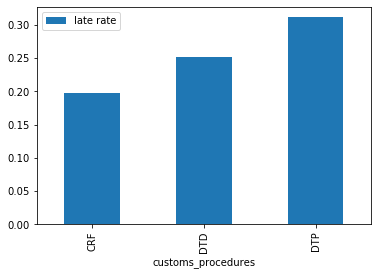

In [53]:
a = orders[orders['late_order'] == True].groupby(by=['customs_procedures']).count()[['order_id']]
b = orders.groupby(by=['customs_procedures']).count()[['order_id']]
c = (a/b).rename(columns={'order_id': 'late rate'})

c.plot(kind='bar')
# fig1, ax1 = plt.subplots()
# ax1.set_title('Effect of Customs Procedures on Lateness Rate')
# ax1.plot(c)

### Effect of Origin Port on Lateness

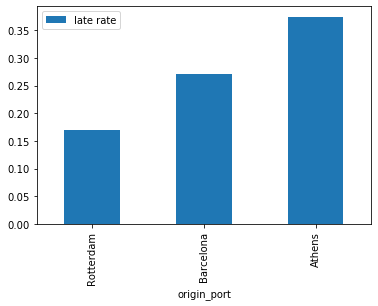

In [39]:
a = orders[orders['late_order'] == True].groupby(by=['origin_port']).count()[['order_id']]
b = orders.groupby(by=['origin_port']).count()[['order_id']]
c = (a/b).rename(columns={'order_id': 'late rate'}).sort_values(by='late rate')

c.plot(kind='bar')

### Effect of Logistic Hub on Lateness

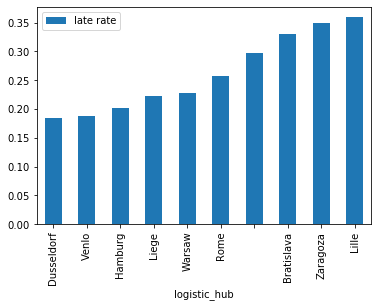

In [40]:
a = orders[orders['late_order'] == True].groupby(by=['logistic_hub']).count()[['order_id']]
b = orders.groupby(by=['logistic_hub']).count()[['order_id']]
c = (a/b).rename(columns={'order_id': 'late rate'}).sort_values(by='late rate')

c.plot(kind='bar')

### Effect of 3rd-party Logistics on Lateness

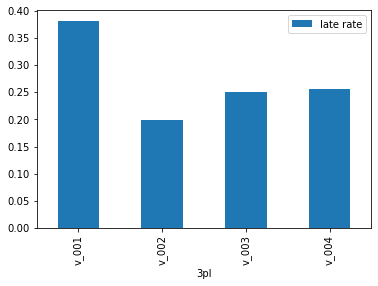

In [42]:
a = orders[orders['late_order'] == True].groupby(by=['3pl']).count()[['order_id']]
b = orders.groupby(by=['3pl']).count()[['order_id']]
c = (a/b).rename(columns={'order_id': 'late rate'})

c.plot(kind='bar')

### Effect of Product ID on Lateness

In [10]:
### 1st try
# a = orders[orders['late_order'] == True].groupby(by=['product_id']).count()[['order_id']]
# b = orders.groupby(by=['product_id']).count()[['order_id']]
# c = (a/b).sort_values('order_id')

# c.plot(kind='bar')

### 2nd try
# num_product_groups = 100

# orders_late = orders[orders['late_order'] == True]
# a = orders_late.groupby(by=pd.cut(orders_late['product_id'], num_product_groups)).count()
# b = orders.groupby(by=pd.cut(orders['product_id'], num_product_groups)).count()
# c = (a/b)

# c.plot(kind='bar')

### Effect of Number of Units on Lateness

In [11]:
max_units = max(orders['units'])
unit_groups = 7
unit_steps = np.linspace(0, max_units, unit_groups + 1)
print(f'max_units: {max_units}')
print(f'unit_groups: {unit_groups}')
print(f'unit_steps: {unit_steps}')

max_units: 951
unit_groups: 7
unit_steps: [  0.         135.85714286 271.71428571 407.57142857 543.42857143
 679.28571429 815.14285714 951.        ]


[0.0,135.85714285714286]: num_late=4, num_in_range=12, percentage=0.3333333333333333
[135.85714285714286,271.7142857142857]: num_late=78, num_in_range=508, percentage=0.15354330708661418
[271.7142857142857,407.57142857142856]: num_late=1937, num_in_range=12160, percentage=0.15929276315789473
[407.57142857142856,543.4285714285714]: num_late=18179, num_in_range=82916, percentage=0.21924598388730765
[543.4285714285714,679.2857142857143]: num_late=6286, num_in_range=17922, percentage=0.35074210467581746
[679.2857142857143,815.1428571428571]: num_late=650, num_in_range=735, percentage=0.8843537414965986
[815.1428571428571,951.0]: num_late=22, num_in_range=23, percentage=0.9565217391304348


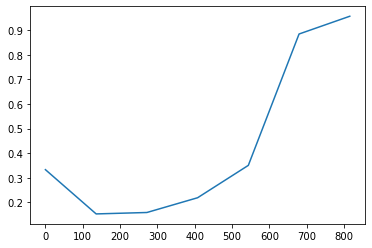

In [12]:
late_percentages = []
for i in range(len(unit_steps) - 1):
    x = orders[orders['units'].between(unit_steps[i], unit_steps[i+1])].groupby('late_order').count()[['units']]
    num_late = x['units'][True]
    num_in_range = x['units'][True] + x['units'][False]
    late_percentages.append(num_late / num_in_range)
    print(f'[{unit_steps[i]},{unit_steps[i+1]}]: num_late={num_late}, num_in_range={num_in_range}, percentage={late_percentages[i]}')

# a = orders[orders['late_order'] == True].groupby(by=['units']).count()[['order_id']]
# b = orders.groupby(by=['units']).count()[['order_id']]
# c = (a/b).sort_values('order_id')

pd.Series(late_percentages, unit_steps[:-1]).plot()

#c.plot(kind='bar')
#orders[orders['units'] < 500].sort_values(by='units').groupby('late_order').sum()[['units']]

## Cities

In [13]:
cities_data = pd.read_csv(data_dir + 'cities_data.csv', sep=';')

cities_data.head()

,city_from_name,city_to_name,city_from_coord,city_to_coord,distance
0,Dusseldorf,Zaragoza,"(51.2254018, 6.7763137)","(41.6521342, -0.8809428)",1214.4772
1,Dusseldorf,Venlo,"(51.2254018, 6.7763137)","(51.39244885, 6.1511724144122955)",47.3876
2,Dusseldorf,Bratislava,"(51.2254018, 6.7763137)","(48.1516988, 17.1093063)",819.2894
3,Dusseldorf,Hamburg,"(51.2254018, 6.7763137)","(53.550341, 10.000654)",339.2215
4,Dusseldorf,Rome,"(51.2254018, 6.7763137)","(41.8933203, 12.4829321)",1125.0290


Empty DataFrame
Columns: [order_id, origin_port, 3pl, customs_procedures, logistic_hub, customer, product_id, units, late_order, city_from_name_1, city_to_name_1, city_from_coord_1, city_to_coord_1, distance_1, city_from_name_2, city_to_name_2, city_from_coord_2, city_to_coord_2, distance_2, total_distance]
Index: []


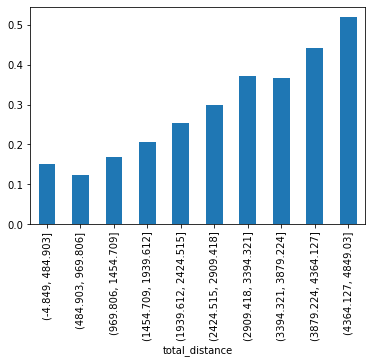

In [29]:
# add distances to '' (i.e. no hub)
cities_data_nohub = cities_data.copy()
cities_data_nohub['city_to_name'] = ''
cities_data_nohub['city_to_coord'] = ''
cities_data_nohub['distance'] = 0.0
cities_data_nohub = cities_data_nohub.drop_duplicates(['city_from_name'])

cities_data_samecity = cities_data.copy()
cities_data_samecity['city_to_name'] = cities_data_samecity['city_from_name']
cities_data_samecity['city_to_coord'] = cities_data_samecity['city_from_coord']
cities_data_samecity['distance'] = 0.0
cities_data_samecity = cities_data_samecity.drop_duplicates(['city_from_name'])

cities_data_with_nohub = pd.concat([cities_data, cities_data_nohub, cities_data_samecity])

cities_data_reverse = cities_data_with_nohub.rename(columns={
    'city_from_name': 'city_to_name',
    'city_to_name': 'city_from_name',
    'city_from_coord': 'city_to_coord',
    'city_to_coord': 'city_from_coord'
})
cities_data_bothway = pd.concat([cities_data_with_nohub, cities_data_reverse]).drop_duplicates(['city_from_name', 'city_to_name'])

# quick fix!
cities_data_bothway = cities_data_bothway.append({
    'city_from_name': '',
    'city_to_name': 'Porto',
    'distance': 1558.0329
}, ignore_index=True).drop_duplicates(['city_from_name', 'city_to_name'], keep='last')

orders_with_distance = orders \
    .merge(cities_data_bothway, how='left', left_on=['origin_port', 'logistic_hub'], right_on=['city_from_name', 'city_to_name']) \
    .merge(cities_data_bothway, how='left', left_on=['logistic_hub', 'customer'], right_on=['city_from_name', 'city_to_name'], suffixes=('_1', '_2'))

orders_with_distance['total_distance'] = orders_with_distance['distance_1'] + orders_with_distance['distance_2']

#print(orders_with_distance[orders_with_distance['total_distance'].isnull()])

num_distance_groups = 10

orders_with_distance_late = orders_with_distance[orders_with_distance['late_order'] == True]
a = orders_with_distance_late.groupby(by=pd.cut(orders_with_distance_late['total_distance'], num_distance_groups)).count()
b = orders_with_distance.groupby(by=pd.cut(orders_with_distance['total_distance'], num_distance_groups)).count()
c = (a/b)['total_distance']

c.plot(kind='bar')

## Cities with Costs

In [15]:
cities_costs = pd.read_csv(data_dir + 'cities_data_costs.csv', sep=',')

cities_costs.head()

,city_from_name,city_to_name,city_from_coord,city_to_coord,distance,weight_class,cost_per_unit,co2_per_unit
0,Dusseldorf,Zaragoza,"(51.2254018, 6.7763137)","(41.6521342, -0.8809428)",1214.4772,0,429.76,819.77
1,Dusseldorf,Zaragoza,"(51.2254018, 6.7763137)","(41.6521342, -0.8809428)",1214.4772,1,472.74,901.75
2,Dusseldorf,Zaragoza,"(51.2254018, 6.7763137)","(41.6521342, -0.8809428)",1214.4772,2,515.71,983.73
3,Dusseldorf,Zaragoza,"(51.2254018, 6.7763137)","(41.6521342, -0.8809428)",1214.4772,3,558.69,1065.70
4,Dusseldorf,Zaragoza,"(51.2254018, 6.7763137)","(41.6521342, -0.8809428)",1214.4772,4,601.66,1147.68


## Product Attributes

In [16]:
product_attributes = pd.read_csv(data_dir + 'product_attributes.csv', sep=',')

product_attributes.head()

,product_id,weight,material_handling
0,1672707,2876,3
1,1694456,2785,5
2,1682865,2751,3
3,1689146,2736,0
4,1664069,2707,4


In [17]:
# product attributes grouped by material handling
product_attributes.groupby(by='material_handling').agg({'product_id': 'count', 'weight': 'sum'})

,product_id,weight
material_handling,,
0,93,127170
1,41,53108
2,127,163801
3,159,197141
4,89,122653
5,263,342273


### Effect of Weight on Lateness

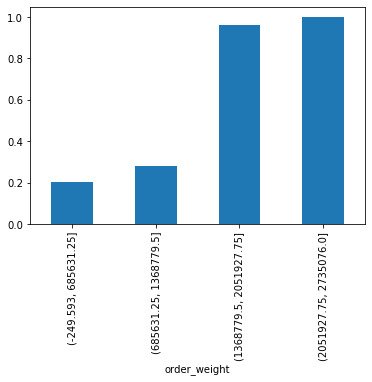

In [18]:
num_weight_groups = 4

a = product_attributes.set_index('product_id').join(orders.set_index('product_id'))
a['order_weight'] = a['weight'] * a['units']
a_late = a[a['late_order'] == True]
b = a_late.groupby(by=pd.cut(a_late['order_weight'], num_weight_groups)).count()
c = a.groupby(by=pd.cut(a['order_weight'], num_weight_groups)).count()
d = (b/c)['weight']

d.plot(kind='bar')

### Effect of Material Handling on Lateness

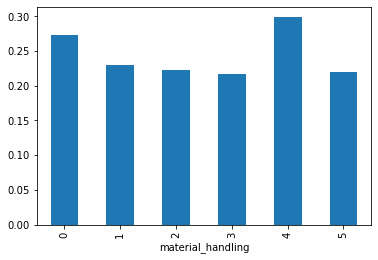

In [19]:
a = product_attributes.set_index('product_id').join(orders.set_index('product_id'), how='inner').set_index('order_id')

b = a[a['late_order'] == True].groupby(by=['material_handling']).count()['origin_port']
c = a.groupby(by=['material_handling']).count()['origin_port']
d = (b/c)
d

d.plot(kind='bar')

## Product Weight Classes

In [20]:
product_weight_classes = pd.read_csv(data_dir + 'product_weight_class.csv', sep=',')

product_weight_classes.head()

,product_id,weight_class
0,1660578,0
1,1699768,0
2,1699799,0
3,1683403,0
4,1682793,0


In [21]:
# grouped by weight classes
product_weight_classes.groupby(by='weight_class').agg({'product_id': 'count'})

,product_id
weight_class,
0,77
1,77
2,77
3,77
4,77
5,77
6,77
7,77
8,77
